In [11]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [12]:
import os
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
import s2fft as s2f
import s2fft.sampling as sample

In [13]:
L = 10
spin = 0

In [14]:
# MW weights over 2*pi
w = np.zeros(2 * L - 1, dtype=np.complex128)
for i in range(-(L - 1), L):
    w[i + L - 1] = sample.mw_weights(i)

w *= np.exp(-1j * np.arange(-(L - 1), L) * np.pi / (2 * L - 1))
wr_mw = np.real(fft.fft(fft.ifftshift(w), norm="backward")) / (2 * L - 1)

In [15]:
# MW weights over pi
q_mw = wr_mw[:L]
q_mw[: L - 1] = q_mw[: L - 1] + (-1) ** spin * wr_mw[-1 : L - 1 : -1]

In [16]:
# MWSS weights over 2*pi
w = np.zeros(2 * L, dtype=np.complex128)
for i in range(-(L - 1)+1, L+1):
    w[i + L - 1] = sample.mw_weights(i-1)

wr_mwss = np.real(fft.fft(fft.ifftshift(w), norm="backward")) / (2 * L)

In [17]:
# MWSS weights over pi
q_mwss = wr_mwss[: L + 1]
q_mwss[1:L] = q_mwss[1:L] + (-1) ** spin * wr_mwss[-1:L:-1]

In [18]:
# Theta samples over 2*pi for plotting
thetas_mw_2pi = sample.t2theta(L, np.arange(2*L-1), "mw")
thetas_mwss_2pi = sample.t2theta(L, np.arange(2*L), "mwss")

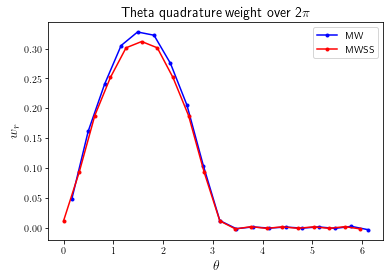

In [19]:
plt.plot(thetas_mw_2pi, wr_mw, 'b.-')
plt.plot(thetas_mwss_2pi, wr_mwss, 'r.-')
plt.xlabel(r"$\theta$", fontsize=14)
plt.ylabel(r"$w_r$", fontsize=14)
plt.title(r"Theta quadrature weight over 2$\pi$", fontsize=14)
plt.legend(["MW", "MWSS"])

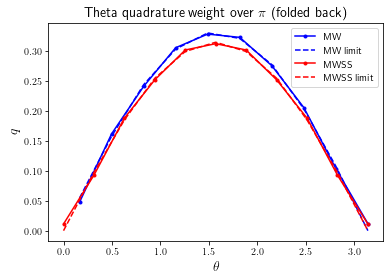

In [20]:
thetas_mw = sample.thetas(L, "mw")
thetas_mwss = sample.thetas(L, "mwss")
plt.plot(thetas_mw, q_mw, 'b.-')
plt.plot(thetas_mw, np.sin(thetas_mw)*(2*np.pi)/(2*L-1), 'b--')
plt.plot(thetas_mwss, q_mwss, 'r.-')
plt.plot(thetas_mwss, np.sin(thetas_mwss)*(2*np.pi)/(2*L), 'r--')

plt.xlabel(r"$\theta$", fontsize=14)
plt.ylabel(r"$q$", fontsize=14)
plt.title(r"Theta quadrature weight over $\pi$ (folded back)", fontsize=14)
plt.legend(["MW", "MW limit", "MWSS", "MWSS limit"])

Note that the MWSS weights are slightly lower than MW for a given theta, since MWSS includes an additional theta sample.